# Cogs 118C, Spring 2020


## HW1

Name: Malachi Mabie

Student ID: A15737533

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile

# 1. Determine periodicity

a) Periodic with $T = \pi/4$  
b) Periodic with $T = \sqrt3$  
c) Periodic with $T = 1/3$  
d) Periodic with $T = 2\pi T$  
e) Nonperiodic  
f) Nonperiodic  

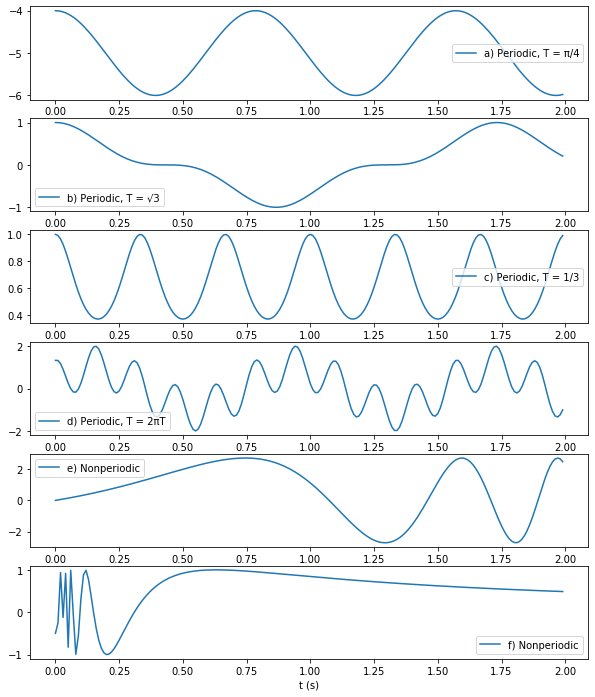

In [2]:
t = np.arange(0, 2, 0.01)
fig, axs = plt.subplots(6, 1, figsize=(10, 12))
ax = axs[0]
# a
ax.plot(t, np.cos(8*t) - 5, label="a) Periodic, T = \u03C0/4")
ax.legend()
ax = axs[1]
# b
ax.plot(t, np.power(np.cos(2 * np.pi * t / np.sqrt(3)), 3), label="b) Periodic, T = \u221A3")
ax.legend()
ax = axs[2]
# c
ax.plot(t, np.exp(-np.square(np.sin(3*np.pi*t))), label='c) Periodic, T = 1/3')
ax.legend()
ax = axs[3]
# d
ax.plot(t, np.sin(t/.125 + 1/3) + np.cos(5*t/.125), label="d) Periodic, T = 2\u03C0T") # T =.125
ax.legend()
ax = axs[4]
# e
ax.plot(t, np.e * np.sin(t*np.exp(t)), label=r"e) Nonperiodic")
ax.legend()
ax = axs[5]
# f
ax.plot(t, np.sin(1/(t+.01) + .01), label=r"f) Nonperiodic")
ax.legend()
plt.xlabel('t (s)')
plt.show()

# 2. Attributes of given signal plots
### a.
    T = 2s
    Fs = 10Hz
    Ts = 6s
### b.
    T = 6.4s
    Fs = 5Hz
    Ts = 19s

# 3. Neurophysiology

### (a) Determine A and f from the neuron->LFP contribution equation

$ A = 0.01 \mu V $

$ f = 5 Hz $

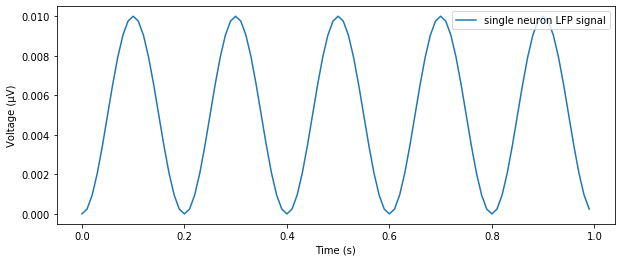

In [3]:
A = 0.01 #microvolts
f = 5 # Hz

# (b) Plot f1(t)
t = np.arange(0, 1, 0.01)
fig, ax = plt.subplots(figsize=(10, 4))

# gaussian white noise (not compositing now bc would overwhelm)
mu, sigma = 0, 10 # standard deviation in microVolts
noise = np.random.normal(mu, sigma, 100) #100 is number of frames in graph

# signal
# (A is measured peak to trough, so dividing by 2. voltage goes up from 0 as well.)
LFP_signal = A/2*-np.cos(2*np.pi*f*t) + A/2

ax.plot(t, LFP_signal, label=r"single neuron LFP signal")
ax.legend()

plt.xlabel('Time (s)')
plt.ylabel('Voltage (\u03BCV)')
plt.show()

In [4]:
# (c) Calculate the RMS amplitude
def calc_rms(signal):
    return np.sqrt(np.mean(signal**2))

rms = calc_rms(LFP_signal)

print("RMS amplitude: ", '%.3f'%rms, "\u03BCV)")

RMS amplitude:  0.006 μV)


In [5]:
# (d) Calculate the total signal RMS as a function of r

# Since the remaining neurons are silent, r exists only as an amplitude multiplier.
# (this will help a ton when we factor in noise, since its sigma has the power of 1000 single neuron amplitudes.)

def total_signal_RMS(r):
    total_neurons = 5000 # r is a fraction of this
    total_amplitude = A*total_neurons*r
    
    return calc_rms(total_amplitude/2*-np.cos(2*np.pi*f*t) + total_amplitude/2)


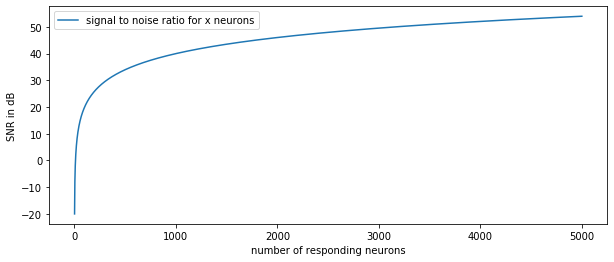

In [6]:
# (e) Plot signal-to-noise ratio (SNR), in decibels, 
#     as a function of the number of neurons which respond to the stimulus
fig, ax = plt.subplots(figsize=(10, 4))
total_neurons = 5000

# gaussian white noise
mu, sigma = 0, 10 # standard deviation in microVolts
noise = np.random.normal(mu, sigma, total_neurons)
noise_RMS = calc_rms(noise)

# plotting number neurons that respond
num = np.arange(1, total_neurons + 1)

# make array of RMS per r
signal_RMS = num
for n in signal_RMS:
    n = total_signal_RMS(n/total_neurons)

# using SNR equation for decibel, with RMS signal and RMS noise.
ax.plot(num, 10*np.log10(signal_RMS**2 / noise_RMS**2), label=r"signal to noise ratio for x neurons")
ax.legend()

plt.xlabel('number of responding neurons')
plt.ylabel('SNR in dB')
plt.show()

### (f) Rat vs cat v1 neurons: which ought to observe a larger field potential SNR?
According to the study, cats have extraordinarily elaborate v1 neuron fields, while rats have robust orientation selectivity but no discernable local structure.

Therefore rats ought to observe a larger field potential SNR.

# 4. Amplifier specs

    "You are considering which amplifier to buy for your electrophysiology recording. The deluxe model offers 10-fold lower noise amplitude (standard deviation) compared to the basic version. How much larger will the SNR be with the deluxe amplifier? Give your answer in dB."

In [7]:
print(10*np.log10(1) - 10*np.log10(1 / 10**2), "dB")

20.0 dB


# 5. Aliasing

In [8]:
# Load audio file. This code will read the wav file
Fs, aud = wavfile.read('HW1_audio.wav')

In [9]:
# The audio file has two channels (stereo - Left and Right). 
# For simplicity, we will keep just one channel.
aud = aud[:,0]

In [10]:
# (a) What are the sampling rate and duration (in s) of the recording?
print("sampling rate: ", Fs/1000, "kHz")

print("duration: ", '%.3f'%((len(aud)+2)/Fs), "s")

sampling rate:  48.0 kHz
duration:  13.305 s


/opt/conda/lib/python3.6/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


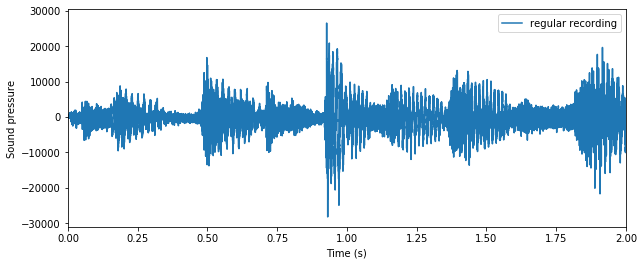

In [11]:
# (b) Make a plot showing the first 2 s of the recording.
# Label the axes (x axis: Time (s), y-axis: Sound pressure).
fig, ax = plt.subplots(figsize=(10, 4))

time = np.linspace(0, len(aud)/Fs, num=len(aud))
ax.plot(time, aud, label=r"regular recording")
ax.legend()

plt.xlim(0,2)
plt.xlabel('Time (s)')
plt.ylabel('Sound pressure')
plt.show()

In [12]:
# (c) Downsample the recording by a factor of 10.
dsamp = 10
aud_dsamp = aud[0:len(aud):dsamp]
print(len(aud_dsamp))

# What is the new sampling rate, Fs_dsamp?
Fs_dsamp = Fs/10
print("Fs_dsamp = ", Fs_dsamp/1000, "kHz")

63864
Fs_dsamp =  4.8 kHz


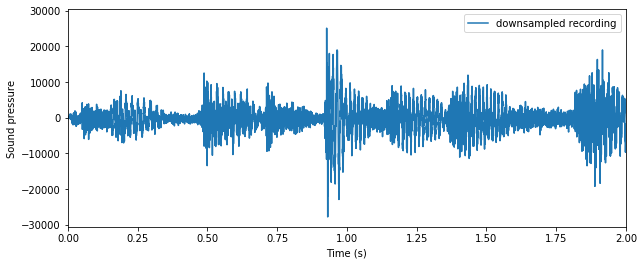

In [13]:
# (d) Plot the downsample
fig, ax = plt.subplots(figsize=(10, 4))

time = np.linspace(0, len(aud_dsamp)/Fs_dsamp, num=len(aud_dsamp))
ax.plot(time, aud_dsamp, label=r"downsampled recording")
ax.legend()

plt.xlim(0,2)
plt.xlabel('Time (s)')
plt.ylabel('Sound pressure')
plt.show()
# doesn't look much different than the original

In [14]:
# (e) Save the audio file
wavfile.write('HW1_dsamp.wav', int(Fs_dsamp), aud_dsamp)
# it sounds closer to 144p youtube video quality.
# Some sounds are fine, but others are tinny or misrepresented completely.

### f. Are audio frequencies around 8 kHz distorted by the downsampling?
    No. If the sample rate was at or below 4 kHz, then this would be the case. But because the sample rate can still pick up a point of modulation between the 8kHz period, the peak and valley of the signal may still be registered.

In [15]:
# Good Vibrations 